**Dima Tsvetkov**

**NetID: dt169**

**Homework #3**

Agreement 1) This assignment represents my own work. I did not work on this assignment with
others. All coding was done by myself.

Agreement 2) I understand that if I struggle with this assignment that I will reevaluate whether
this is the correct class for me to take. I understand that the homework only gets harder.

Problem1:Linearregressiononasimpledataset(30 pts)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
XY_raw = pd.read_csv('Concrete_Data_Yeh.csv')
XY_raw

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [20]:
XY_raw.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<AxesSubplot:>

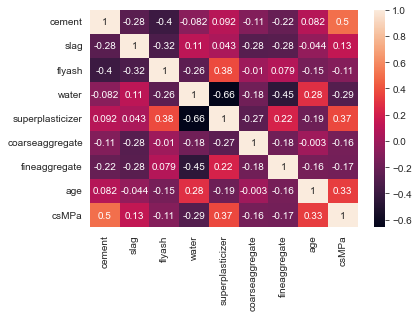

In [16]:
sns.heatmap(XY_raw.corr(), annot=True)

Processing the data.

In [98]:
X = XY_raw.iloc[:, :-1]
y = XY_raw.iloc[:, -1]

In [99]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print(reg.score(X, y), '\n', reg.coef_, reg.intercept_)

0.6155198704142721 
 [ 0.11980433  0.10386581  0.08793432 -0.14991842  0.2922246   0.01808621
  0.02019035  0.11422207] -23.331213584903594


In [101]:
print(reg.predict(X))

[53.46346329 53.73475651 56.81258504 ... 26.46841169 29.12237014
 31.89770807]


First, let's find the derivatives of MSE loss function with respect to weights (including the bias $\beta_0$).
$$MSE=\frac{1}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0)^2.$$
Thus, the derivative with respect to weight $\beta$:
$$\frac{\partial MSE}{\partial \beta}=-\frac{2}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0) X_i$$
and with respect to bias $\beta_0$:
$$\frac{\partial MSE}{\partial \beta_0}=-\frac{2}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0)$$

In [220]:
# because it's being used everywhere
def y_predicted(X, coef, bias):
	return np.dot(X, coef.T) + bias


# MSE loss
def MSE(X, y, coef, bias):
	y_pred = y_predicted(X, coef, bias)
	dif = y - y_pred
	# loss = np.mean(dif ** 2)
	loss = np.dot(dif.T, dif) / len(y)
	return loss


# d MSE/d beta
def gradient_beta(X, y, coef, bias):
	dif = y - y_predicted(X, coef, bias)
	# partial = -2 * X.multiply(dif, axis=0)
	# grad = np.mean(partial, axis=0)
	grad = -2 * np.dot(dif.T, X) / len(y)
	return grad


# d MSE/d beta_0
def gradient_beta0(X, y, coef, bias):
	dif = y - y_predicted(X, coef, bias)
	grad = -2 * np.sum(dif) / len(y)
	return grad


coef = np.zeros(np.shape(X)[1])
bias = 0
learning_rate = 0.0000001
learning_rate_bias = 0.01
# coef = [ 0.11980433,  0.10386581,  0.08793432, -0.14991842,  0.2922246,   0.01808621, 0.02019035,  0.11422207]
# bias = -23.331213584903594
# bias = -0
# print(MSE(X, y, coef, bias))
# print(y_predicted(X, coef, bias))
for i in range(100000):
	# print(gradient_beta(X, y, coef, bias))
	# print(gradient_beta(X, y, coef, bias))
	coef -= learning_rate * gradient_beta(X, y, coef, bias)
	bias -= learning_rate_bias * gradient_beta0(X, y, coef, bias)
print(coef, bias)
# print(np.dot(X, X.T)**-1)
# print(np.dot(np.dot((np.dot(X, X.T)**-1), X).T, y))
# print((np.linalg.inv(np.dot(X.T, X))))
# print(np.dot(np.dot((np.linalg.inv(np.dot(X.T, X))), X.T), y))
# print(np.dot((np.dot(X, X.T)**-1), X))
# print(np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)) * X.T), Y))
# [ 0.11980433  0.10386581  0.08793432 -0.14991842  0.2922246   0.01808621
#  0.02019035  0.11422207] -23.331213584903594
# [ 0.12615105  0.11030733  0.10206241 -0.15808842  0.04520626  0.0148587
#  0.02434598  0.11255708] -23.331213584903594

[ 0.0985917   0.06659756  0.05165472 -0.05985131  0.01672521 -0.00703036
  0.00581468  0.07961173] 9.852997686606239


In [221]:
print(MSE(X, y, coef, bias))
y_predicted(X, coef, bias)

129.5115627295077


array([52.28669782, 52.1812424 , 56.87558541, ..., 28.44663288,
       27.51089528, 35.03012022])

In [218]:
X_new = X.copy()
X_new['bias'] = np.ones(len(y))
print(np.dot(np.dot((np.linalg.inv(np.dot(X_new.T, X_new))), X_new.T), y))
coef2 = np.array([0.11980433, 0.10386581, 0.08793432, -0.14991842, 0.2922246, 0.01808621, 0.02019035, 0.11422207])
bias2 = -23.331213584903594
print(MSE(X, y, coef2, bias2))

[ 1.19804334e-01  1.03865809e-01  8.79343215e-02 -1.49918419e-01
  2.92224595e-01  1.80862148e-02  2.01903511e-02  1.14222068e-01
 -2.33312136e+01]
107.19723607490728


In [214]:
reg.predict(X)

array([53.46346329, 53.73475651, 56.81258504, ..., 26.46841169,
       29.12237014, 31.89770807])

First, let's find the derivatives of MSE loss function with respect to weights (including the bias $\beta_0$).
$$MSE=\frac{1}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0)^2.$$
Thus, the derivative with respect to weight $\beta$:
$$\frac{\partial MSE}{\partial \beta}=(-\frac{2}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0))^T X$$
and with respect to bias $\beta_0$:
$$\frac{\partial MSE}{\partial \beta_0}=-\frac{2}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0)$$

***Problem2:Multinomial Logistic regression from pre-trained feature extractor(45pts)***
**Step 1**

In [1]:
import torch
import torch.nn as nn


class extractor(nn.Module):
	def __init__(self):
		super().__init__()
		self.conv1 = nn.Sequential(
			nn.Conv2d(1, 16, 5, 1, 2),
			nn.ReLU(), nn.MaxPool2d(kernel_size=2))

		self.conv2 = nn.Sequential(
			nn.Conv2d(16, 32, 5, 1, 2),
			nn.ReLU(), nn.MaxPool2d(2))

		self.dim_redu = nn.Sequential(nn.Linear(32 * 7 * 7, 256), nn.Tanh())

	def forward(self, x):
		N, C, W, H = x.shape
		assert C == 1 and W == 28 and H == 28, 'input tensor should be of dimension N*1*28*28'

		x = self.conv1(x)
		x = self.conv2(x)
		# flatten the output of conv2 to (batch_size, 32 * 7 * 7)
		x = x.view(x.size(0), -1)

		return self.dim_redu(x)

In [5]:
feature_extr = extractor()
feature_extr.load_state_dict(torch.load('feature_extractor_weights.pth'))

<All keys matched successfully>

Reading the files using the standard instruction from the kaggle website (https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook)

In [21]:
import numpy as np  # linear algebra
import struct
from array import array
from os.path import join


#
# MNIST Data Loader Class
#
class MnistDataloader(object):
	def __init__(self, training_images_filepath, training_labels_filepath,
	             test_images_filepath, test_labels_filepath):
		self.training_images_filepath = training_images_filepath
		self.training_labels_filepath = training_labels_filepath
		self.test_images_filepath = test_images_filepath
		self.test_labels_filepath = test_labels_filepath
		print()

	def read_images_labels(self, images_filepath, labels_filepath):
		labels = []
		with open(labels_filepath, 'rb') as file:
			magic, size = struct.unpack(">II", file.read(8))
			if magic != 2049:
				raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
			labels = array("B", file.read())

		with open(images_filepath, 'rb') as file:
			magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
			if magic != 2051:
				raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
			image_data = array("B", file.read())
		images = []
		for i in range(size):
			images.append([0] * rows * cols)
		for i in range(size):
			img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
			img = img.reshape(28, 28)
			images[i][:] = img

		return images, labels

	def load_data(self):
		x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
		x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
		return (x_train, y_train), (x_test, y_test)

All files are good



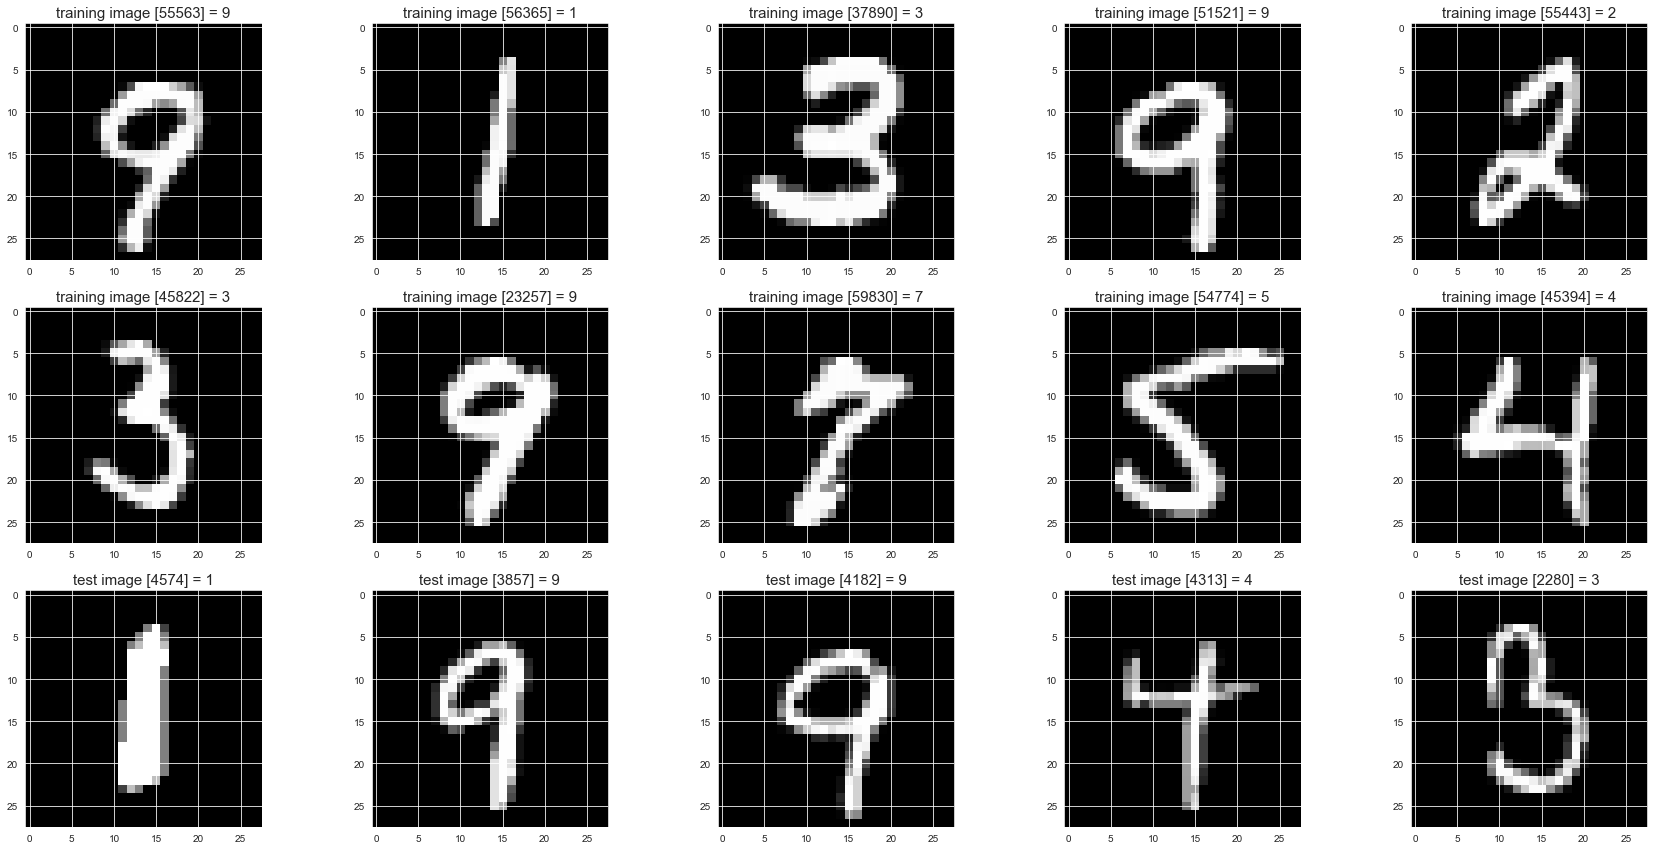

In [25]:
#
# Verify Reading Dataset via MnistDataloader class
#
# % matplotlib inline
import random
import matplotlib.pyplot as plt
import os.path

#
# Set file paths based on added MNIST Datasets
#
input_path = 'input/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

# checking the files myself
if (
		os.path.isfile(training_images_filepath)
		and os.path.isfile(training_labels_filepath)
		and os.path.isfile(test_images_filepath)
		and os.path.isfile(test_labels_filepath)
):
	print('All files are good')


#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
	cols = 5
	rows = int(len(images) / cols) + 1
	plt.figure(figsize=(30, 20))
	index = 1
	for x in zip(images, title_texts):
		image = x[0]
		title_text = x[1]
		plt.subplot(rows, cols, index)
		plt.imshow(image, cmap='gray')
		if title_text != '':
			plt.title(title_text, fontsize=15)
		index += 1


#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath,
                                   test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
	r = random.randint(1, 60000)
	images_2_show.append(x_train[r])
	titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 5):
	r = random.randint(1, 10000)
	images_2_show.append(x_test[r])
	titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(images_2_show, titles_2_show)

Just collecting some knowledge on the data for myself

In [31]:
print(len(x_train))
print(len(x_test))
print(x_test[0])
print(y_test[0])

60000
10000
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8), array([  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8), array([  0,   0,   0

In [ ]:
def forward(self, x):
		N, C, W, H = x.shape
		assert C == 1 and W == 28 and H == 28, 'input tensor should be of dimension N*1*28*28'

		x = self.conv1(x)
		x = self.conv2(x)
		# flatten the output of conv2 to (batch_size, 32 * 7 * 7)
		x = x.view(x.size(0), -1)

		return self.dim_redu(x)

torch.Size([10000, 1, 28, 28])
tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116., 125.,
         171., 255., 255., 150.,  93.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 169., 253., 253.,
         253., 253., 253., 253., 218.,  30.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   

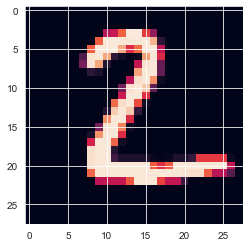

In [44]:
# import torchvision
# X_test = torchvision.transforms.ToTensor()(np.array(x_test))
A = torch.Tensor(x_test)[None].reshape(-1, 1, 28, 28)
print(A.shape)
print(A[1][0])
plt.imshow(A[1][0])


In [39]:
print(X_test.shape)
feature_extr.forward(np.array(x_test[0]))


torch.Size([28, 10000, 28])


ValueError: not enough values to unpack (expected 4, got 2)